In [20]:
# Use of IPython.display and HTML for using css to format text in Markdown based on
# www.dataquest.io/blog/advanced-jupyter-notebooks-tutorial
from IPython.display import HTML
HTML(
    "<style>\
    span.str {color:#BA2121; font-style:italic; font-weight:bold;}\
    span.num {color:#080; font-style:italic; font-weight:bold;}\
    span.bltn {color:#080; font-weight:bold;}\
    span.op {color:#AA22FF;}\
    span.func {color:#00F;}\
    h3.yt {color:#009900; font-style:italic;}\
    span.yt {color:#009900; font-style:italic;}</style>"
)

<h2><b><u>Case Study: Iris Dataset - Intermediate </u></b></h2>

<h3><b><i>Background</i></b></h3>
Irises come in many different colors, shapes, and varieties. Over 300 individual species are part of the Iris genus [1]. In 1936, R.A. Fisher collected measurements on 4 different plant attributes, from 3 different iris species, creating a dataset known as the Iris dataset [2]. 

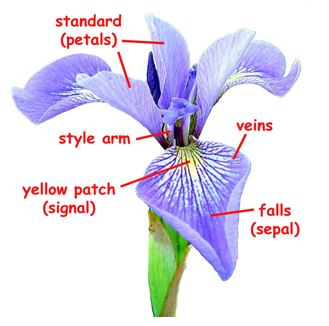


The four measurements in the Iris dataset are: the sepal length, sepal width, petal length, and petal width. These are shown in the above image [3]. The three species of irises in the datset are: setosa, versicolor, and virginica, which are shown in order in the images [4],[5],[6] below.

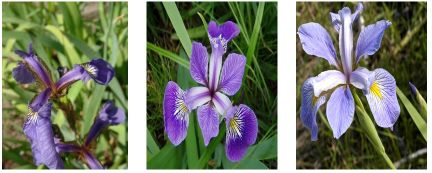

<h3><b><i>Goal</i></b></h3>
The goal of this Case Study is to practice creating visualizations using the Seaborn library. The content of this Case Study is similar to what you've learned in DataCamp's <a href = "https://learn.datacamp.com/courses/intermediate-data-visualization-with-seaborn" >Intermediate Data Visualization with Seaborn </a> and in DASC 2113 lecture. 

<h3><b>Data</b></h3>
The data used in this Case Study is the Iris dataset discussed above. The Iris dataset will be imported directly from the scikit-learn library. 

Sources: 
<ol style = "font-size:8px">
    <li>Boeckmann, Catherine. 2021. The. Old Farmers Almanac. https://www.almanac.com/plant/irises</li>
    <li>Dua, D. and Graff, C. 2019. "Iris Dataset". UCI Machine Learning Repository.  Irvine, CA: University of California, School of Information and Computer Science.[http://archive.ics.uci.edu/ml].</li>
    <li>Conrad, Jim. "Parts of Iris Flower". Backyard Nature. Image. The Iris Flower. USDA & US Forest Service. https://www.fs.fed.us/wildflowers/beauty/iris/flower.shtml. 
    <li>Wikipedia. 2015. "Kosaciec_szczecinkowaty_Iris_setosa.jpg". Image.  https://commons.wikimedia.org/wiki/File:Kosaciec_szczecinkowaty_Iris_setosa.jpg.</li>
    <li>Langlois, Danielle. 2005. "Blue flag flower close-up (Iris versicolor)". Wikipedia. Image.  https://en.wikipedia.org/wiki/Iris_flower_data_set#/media/File:Iris_versicolor_3.jpg.</li>
    <li>Mayfield, Frank. 2007. "image of Iris virginica shrevei BLUE FLAG at the James Woodworth Prairie Preserve - a bud and a single flower at full bloom". Wikipedia. Image. https://en.wikipedia.org/wiki/Iris_flower_data_set#/media/File:Iris_virginica.jpg</li>

</ol>

<h4><u>Importing Libraries and Loading the Data</u></h4>

In the previous Case Study, you learned how to import the Iris dataset and format it for use. This is condensed into the Code Cell below. Please refer to the previous Iris Dataset Case Study if you need to review what this code does in more detail. 

The only difference in this Code Cell is that <b><i>Seaborn</i></b> is now imported as <b><i>sns</i></b>. If you do not have <b><i>Seaborn</i></b> already installed, you will need to do so in order to complete this Case Study. 

In [21]:
# Import 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import random 

# Load Iris dataset 
iris_data = datasets.load_iris()

# Extract data values and target_name values
iris_df = pd.DataFrame(iris_data["data"], columns = ["sepal_len", "sepal_w", "petal_len", "petal_w"])
target_names = iris_data["target_names"]

# Format the target names for use with the iris_df by repeating each name 50 times 
species_names = np.concatenate([np.repeat(x, 50) for x in target_names])

# Append the new species column 
iris_df["species"] = species_names

<h4><u>Descriptive Statistics - Petal Length</u></h4>

Before creating any visualizations using Seaborn, let's first calculate the <b><i>descriptive statistics</i></b> for <i>petal length</i>. 

In [22]:
# Petal length descriptive statistics
petal_len_stats = iris_df["petal_len"].describe()

# Print petal length statistics 
print(petal_len_stats)
# Get statistics by species 
petal_len_spec_stat = iris_df.groupby(["species"])["petal_len"].describe()

# Print petal length statistics 
print(petal_len_spec_stat)

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_len, dtype: float64
            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9


<h4><u>Visualizing Petal Length Using a Displot Histogram</u></h4>

On DataCamp you learned how to use the <b>distplot</b> function to create several different plots such as a <b><i>histogram, KDE plot, and rug plot</i></b> by specifying the corresponding parameter as <span class="bltn">True</span>. The <a href = "https://seaborn.pydata.org/generated/seaborn.distplot.html"><b>Distplot</b> function has been depreciated </a> and replaced with <b>displot</b>. Instead of using a using True or False to create a histogram or a KDE plot, <b>displot</b> uses the <b><i>kind</i></b> parameter with either <b><i>hist, kde, or ecdf</i></b> as acceptable arguments. Let's see how <b>displot</b> is used to create a <b><i>histogram</i></b> of <i>petal length</i>. 

<class 'seaborn.axisgrid.FacetGrid'>


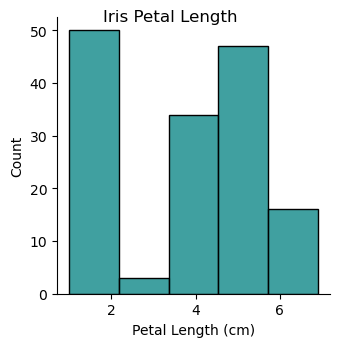

In [23]:
# Histogram of petal length 
hist = sns.displot(x = "petal_len", data = iris_df, kind = "hist", bins = 5, height = 3.5, color = "teal")

# Check the object type returned by displot and print it
print(type(hist))

# Access the Figure for hist displot
fig = hist.fig

# Set the Figure title 
fig.suptitle("Iris Petal Length")

# Access the Axes for hist displot. This returns a 2D numpy array, so either need to access it as so or flatten it into 1D
axs = hist.axes
axs[0][0].set_xlabel("Petal Length (cm)")
axs[0][0].set_ylabel("Count")

plt.show()


To make the above histogram, different arguments are passed in to the <b>displot</b> function. The attribute of interest to plot, <i>petal_len</i>, is specified on the <b><i>x</i></b> axis. <i>Petal_len</i> is an attributte in the <b><i>iris_df</i></b> DataFrame, which is where the <b><i>data</i></b> is from. To set the plot as a histogram, the <b><i>kind</i></b> of plot is set to <span class="str">"hist"</span> with the number of <b><i>bins</i></b> for the histogram set to <span class="num">5</span>. The <b><i>height</i></b> of the histogram's Figure is specified to be <span class="num">3.5 inches</span> which allows Seaborn to calculate the appropriate width from the specified heigh value. The <b><i>color</i></b> of the histogram bins is specified as <span class="str">"teal"</span>. 

The type of object returned by the <b>displot</b> function is a <b><i>FacetGrid</i></b> object (<b><i>hist</i></b>). A <b><i>FacetGrid</i></b> uses Seaborn's Figure-level interface to access its components which differs from <b>displot</b> which returns an Axes object that uses the Axes-level interface <a href = "https://seaborn.pydata.org/generated/seaborn.displot.html">(Seaborn, 2021a)</a><a href = "https://seaborn.pydata.org/generated/seaborn.distplot">(Seaborn, 2021b)</a>. This means that we'll have to learn how to use the Figure-level interface to work with <b>displot</b>. 

The <b><i>Figure</i></b> and <b><i>Axes</i></b> of a <b><i>FacetGrid</i></b> can be accessed through the Figure-level interface by specifying the <b><i>figure</i></b> and <b><i>axes</i></b> properties of <b><i>hist</i></b> and storing in the variables <b><i>fig</i></b> and <b><i>axs</i></b>. Now the Matplotlib method's used in the previous Case Study are accessible. The title of the Figure is set using <b>suptitle</b>. The x and y-axis labels are set as well. One important difference to note is that <b><i>FacetGrid</i></b> specifies the Axes as 2-dimensional. This means it will need to be accessed as so or flattened/reshaped into a 1-dimensional NumPy array. 

<h4><u>Visualizing Petal Length Using a Displot KDE & Rug Plot</u></h4>

Now let's create a <b><i>KDE plot</i></b> using Seaborn's <b>displot</b> function. In addition to the <b><i>KDE plot</i></b> a <b><i>rug plot</i></b> will also be included. 

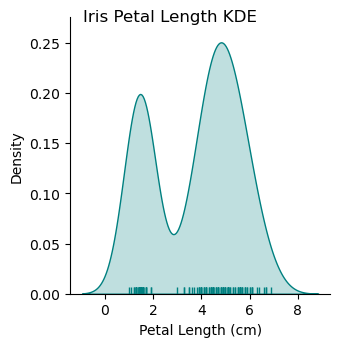

In [24]:
# Create a KDE plot
rug = sns.displot(x = "petal_len", data = iris_df, kind = "kde", fill = True, color = "teal", height = 3.5, rug = True)

# Set title and label 
rug.set_axis_labels("Petal Length (cm)", "Density")
rug.fig.suptitle("Iris Petal Length KDE")

# Show 
plt.show()

A KDE plot was created using <b>displot</b> by specifying the <b><i>kind</i></b> of plot as <span class="str">"kde"</span>. The area of the KDE figure is shaded by specifying <b><i>fill</i></b> as <span class="bltn">True</span>. A <b><i>rug plot</i></b> is added to the bottom of the plot by specifying <b><i>rug</i></b> as <span class="bltn">True</span>. The x and y-axes labels are set using the <b>set_axis_labels</b> method. 

Recall from last Case Study that a histogram was created to display the <i>petal length</i> by <i>species</i>. Let's recreate this using Seaborn. 

<h4><u>Petal Length by Species - Histogram and KDE </u></h4>

First let's create a custom color palette called <b><i>species_palette</i></b> by using Seaborn's <b>color_palette</b> function. This will allow us to visualize the species in similar colors as the last Case Study. The <b><i>species_palette</i></b> can be passed to the <b><i>palette</i></b> keyword to be applied to a plot. 

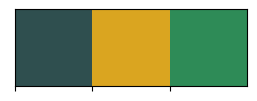

In [41]:
# Create custom color palette for the iris species 
colors_used = ["darkslategrey", "goldenrod", "seagreen"]
species_palette = sns.color_palette(colors_used, 3, as_cmap = True)

# Display palette
sns.palplot(species_palette)
plt.show()

The <b><i>species_palette</i></b> will be applied to the histogram and KDE plots below. Instead of using <b>displot</b>, the <b>histplot</b> and <b>kdeplot</b> methods will be used. Both of these methods use the Axes-level interface. Using the Axes-level interface is very similar to how you made visualizations in the previous Case Study. 

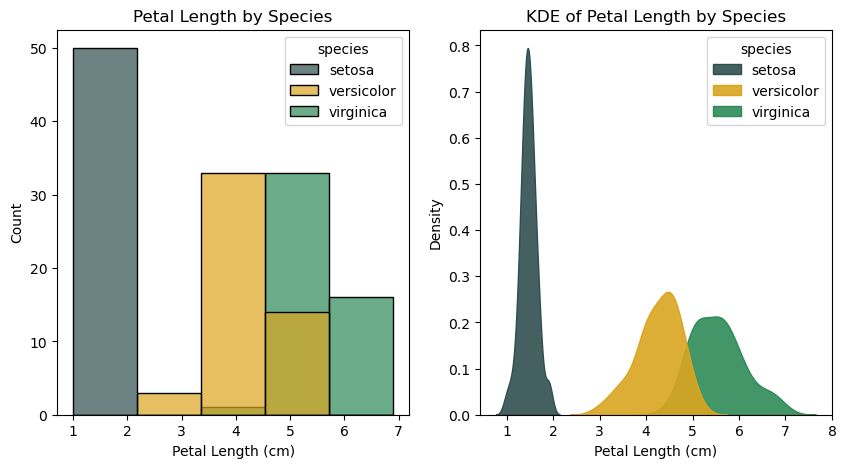

In [42]:
# Create figure and axes to put the histogram and kde plot side-by-side
fig, axs = plt.subplots(1,2, figsize = (10, 5))

# Create histogram and its components
hist_plot = sns.histplot(x = "petal_len", data = iris_df, bins = 5, palette = species_palette, alpha = .7, hue = "species", legend = True, ax = axs[0])
hist_plot.set_title("Petal Length by Species")
hist_plot.set_xlabel("Petal Length (cm)")

# Create kde plot and its components 
kde_plot = sns.kdeplot(x = "petal_len", data = iris_df, palette = species_palette, fill = True, alpha = .9, hue = "species", legend = True, ax = axs[1])
kde_plot.set_title("KDE of Petal Length by Species")
kde_plot.set_xlabel("Petal Length (cm)")

# Show
plt.show()

The code for the histogram and kde plot is very similar to how Subplots, Figures, and Axes were created last Case Study. The histogram returned by <b>histplot</b> is plotted on the first Axes (<b><i>axs[0]</i></b>) by specifying the <b><i>ax</i></b> object euqal to it. The <b><i>hue</i></b> is set to unique values in the <i>species</i> column of <b><i>iris_df</i></b>. This tells the Seaborn <b>histplot</b> and <b>kdeplot</b> functions to plot the <i>petal_len</i> for each species on the specified Axes.

<b><i>Alpha</i></b> is set to .7 for the histogram, which allows enough transparency in the <b><i>species_palette</i></b> that the different species are visible in the histogram. The different species are more separated in the KDE plot, so <b><i>alpha</i></b> is set to .9 for it. Both <b><i>histplot</i></b> and <b><i>kdeplot</i></b> automatically populate the legend based on the value set in <b><i>hue</i></b> and place it on the appropriate plot. 

<h4><u>Creating a Swarm Plot </u></h4>

Next, let's create a <b><i>swarm plot</i></b>. The swarm plot will display each iris's petal length measurement from the Iris dataset categorized by species and will make sure that each measurement is visible and does not obscure another measurement <a href = "https://seaborn.pydata.org/generated/seaborn.swarmplot.html">(Seaborn, 2021)</a>. 

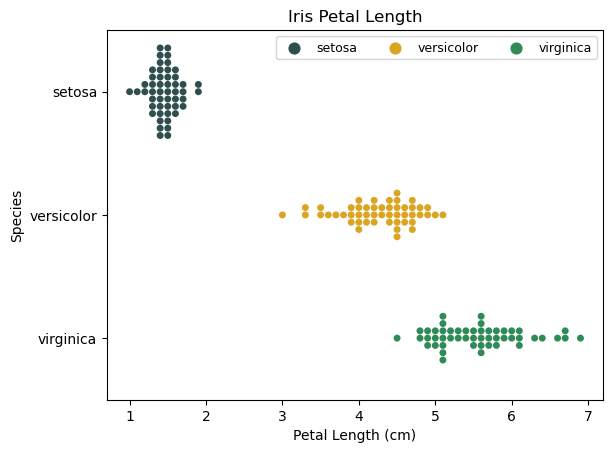

In [27]:
# Create the plot
swarm = sns.swarmplot(x = "petal_len", y = "species", data = iris_df, palette = species_palette, size = 5, hue = "species")

# Get the Axes object. 
swarm_axs = swarm.axes
swarm_axs.set_title("Iris Petal Length")
swarm_axs.set_xlabel("Petal Length (cm)")
swarm_axs.set_ylabel("Species")
swarm_axs.legend(ncol = 3, loc = "upper right", fontsize = 9)

# Show 
plt.show()

The code for the swarmplot is similar to the other Seaborn functions used so far. The only differences is the <b><i>size</i></b> of the marker is specified as <span class="num">4</span> in <b>swarmplot</b> to allow all data measurements to fit on the plot. Since a Figure and Axes are not created beforehand, the returned Axes object by swarmplot is accessed by specifying the <b><i>axes</i></b> attribute as <b><i>swarm_axs</i></b>. The labels, title, and legend properties are then able to be modified. 


<h4><u>Creating a Boxen (Letter Value) Plot </u></h4>

The <b><i>swarm plot</i></b> shows individual measurements of <i>petal length</i> which does not give much insight into the data's distribution. A <b><i>boxen plot</i></b>, also known as a <b><i>level plot</i></b>, can provide more insight into the data's distribution. The boxen plot includes more quantitles than the <b><i>box plot</i></b> and also use shading to display the data <a href = "https://seaborn.pydata.org/generated/seaborn.boxenplot.html">(Seaborn, 2021)</a>. Let's see what this looks like with <i>petal length</i>. 

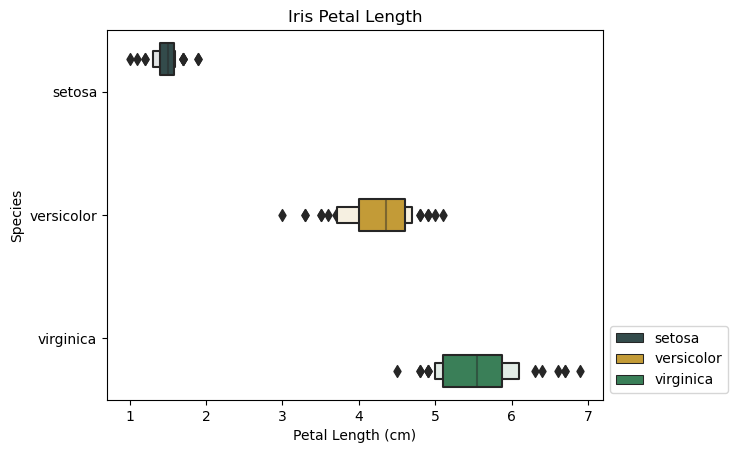

In [28]:
# Create boxen plot
boxen_plot = sns.boxenplot(x = "petal_len", y = "species", data = iris_df, palette = species_palette, hue = "species")

# Get Axes returned by v_plot
boxen_axes = boxen_plot.axes

boxen_axes.set_title("Iris Petal Length")
boxen_axes.set_xlabel("Petal Length (cm)")
boxen_axes.set_ylabel("Species")
boxen_axes.legend(loc = "lower left", bbox_to_anchor = (1, 0))

# Show
plt.show()

<h4><u>Creating a Bar Plot </u></h4>

A <b><i>bar plot</i></b> in Seaborn displays the specified statistic of the attribute, in this case the <b><i>mean</i></b> <i>petal length</i>, along with a confidence interval appended to the top of the bar <a href = "https://seaborn.pydata.org/generated/seaborn.barplot.html">(Seaborn, 2021)</a>. 

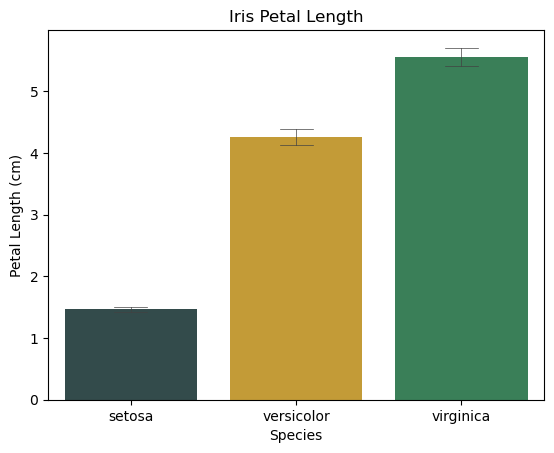

In [29]:
# Create bar plot of petal length 
bar_plot = sns.barplot(x = "species", y = "petal_len", data = iris_df, palette = species_palette, estimator = np.mean, ci = 95, capsize = .2, errwidth = .5)

# Get the returned axes
bar_plot_axs = bar_plot.axes

# Add title and labels 
bar_plot_axs.set_title("Iris Petal Length")
bar_plot_axs.set_xlabel("Species")
bar_plot_axs.set_ylabel("Petal Length (cm)")

# Show plot
plt.show()

New parameters in the <b>barplot</b> function are <b><i>estimator, ci, </i></b> and <b><i>errwidth</i></b>. The <b><i>estimator</i></b> is the NumPy function used to calculate the values represented by the bars in the bar plot, which in this case is the <b><i>mean</i></b>. The <b><i>ci</i></b> parameter is set to 95 to specify that the 95% confidence interval should be calculated for the mean <i>petal length</i>. <b><i>Capsize</i></b> is set to .2 to display the endcaps of the error bar on the plot. Without the <b><i>capsize</i></b> argument, the error bars would be displayed as a thin line. The <b><i>errwidth</i></b> parameter controls the thickness of the error bars. Setting it to the value of .5 makes the error bars appear thinner than the default setting. 

<h4><u>Plotting Data with a Fitted Regression Line</u></h4>

The <b>regplot</b> function in Seaborn can be used to display a fitted regression line along with the data it has been fitted to. Let's specify <i>petal length</i> as the <b><i>dependent variable</i></b> and <i>petal width</i> as the <b><i>independent variable</i></b>. 

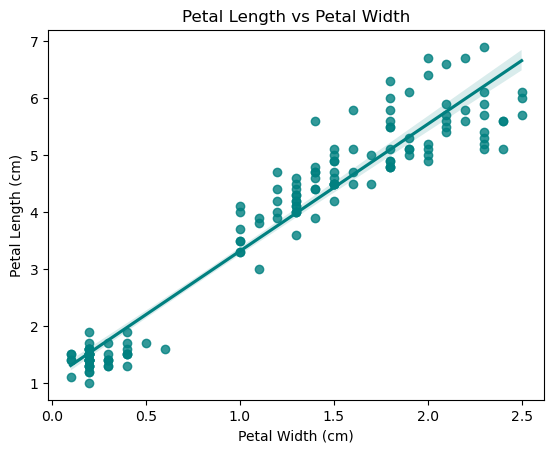

In [30]:
# Create the regression plot
reg_plot = sns.regplot(x = "petal_w", y = "petal_len", data = iris_df, ci = 95, fit_reg = True, scatter = True, color = "teal")

# Get the Axes object. 
reg_axs = reg_plot.axes
reg_axs.set_title("Petal Length vs Petal Width")
reg_axs.set_xlabel("Petal Width (cm)")
reg_axs.set_ylabel("Petal Length (cm)")

# Show
plt.show()

The <b>regplot</b> function has two new parameters <b><i>fit_reg and scatter</i></b>. The <b><i>fit_reg</i></b> parameter is set to <span class="bltn">True</span> to estimate the fitted regression line for the data. <b><i>Scatter</i></b> is set to <span class="bltn">True</span> to allow the scatterplot of <i>petal length</i> versus <i>petal width</i> to be displayed. A 95% confidence interval is displayed as the light blue around the regression line by specifying <b><i>ci</i></b> as 95. 

In the plot above <i>petal length</i> and <i>petal width</i> are examined without considering iris species. The iris species can also be used as a grouping and a fitted regression line calculated for each group using the <b>lmplot</b> function. Let's look at how this is done in the next section. 

<h4><u>Plotting Groups of Data with Fitted Regression Lines</u></h4>

The <b>lmplot</b> function can be used to fit and plot the regression line for multiple groups, in this case the groups are the iris <i>species</i>. <b><i>Lmplot</i></b> returns a <b><i>FacetGrid</i></b> object which requires working with the Figure object. 

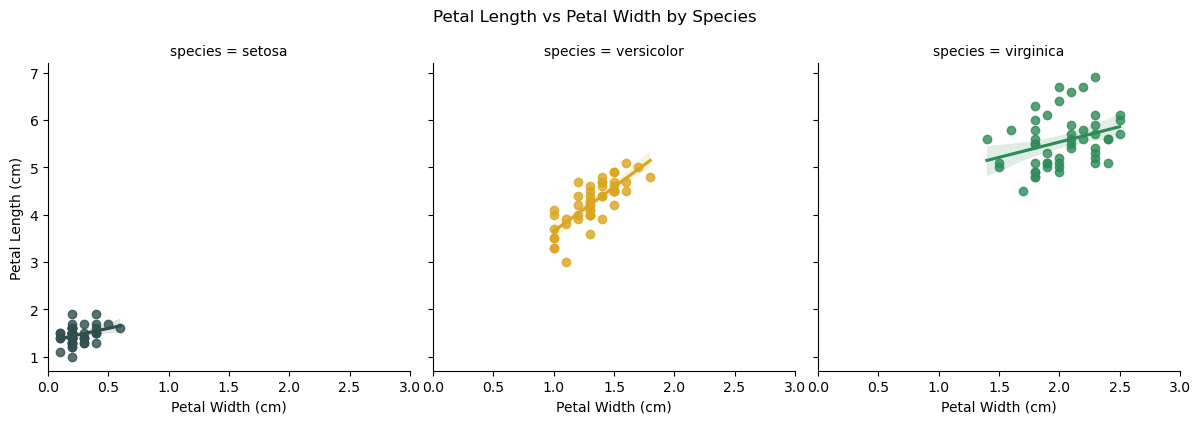

In [31]:
# Create the lmplot
lm_plot = sns.lmplot(x = "petal_w", y = "petal_len", data = iris_df, ci = 95, palette = species_palette, hue = "species", col = "species", height = 4)

# Set title 
lm_plot.fig.suptitle("Petal Length vs Petal Width by Species", y = 1.05)

# Get the Axes objects
lm_plot_axs = lm_plot.fig.axes

# Adjust the x-axis limits to be between [0,3]. 
# Data points were getting cut off in the left and right-most plots at the default settings. 
# Set other components of the subplots 
[x.set(xlim = (0,3), xlabel = "Petal Width (cm)", ylabel = "Petal Length (cm)") for x in lm_plot_axs]

# Show
plt.show()

The <b>lmplot</b> function is similar to the <b>regplot</b> function in terms of most of the parameters used. The <b><i>col</i></b> parameter is added to place each <i>species</i> in its own separate Axes which is also called a facet for the <b><i>FacetGrid</i></b> object. The <b><i>height</i></b> of the lmplot is specified as 4 to allow all components of the plot to clearly display. 

A Figure title is set using the <b>suptitle</b> method and moved to the Figure's y-coordinate of 1.05. The Figure title has to be shifted otherwise it will overlap with the subplot on the center Axes.  In this Case Study, you've seen several different ways to modify parameters that control the way a figure looks, such as the x and y labels. The Code Cell above has an additional example of how this can be done. 

The Axes x and y-labels and x-axis limits are set by using the <b>set</b> function and specifying those particular components by their <b>parameter</b> name. Each Axes has these set by using a list comprehension to iterate over each Axes returned by the FacetGrid's Figure. 

<h4><u>Creating a Heat Map</u></h4>

What if the <i>iris dataset</i> had an additional column called <i>color</i> that listed the color of that particular iris. <i>Color</i> could be treated as an additional group/factor for the dataset. A <b><i>heat map</i></b> could then be used to see how <i>petal length</i> varies between the <i>species</i> as one group and the <i>color</i> as a second group. 

First let's create a color column and randomly select a color to assign to each iris in the dataset. 

In [32]:
# Set seed to 0 to be repeatable between Case Study users 
random.seed(0)

# Make up some colors that an iris might be
color_choices = ["dark purple", "purple", "blue violet", "lavender"]

# Assign a random color to each iris 
iris_df["color"] = random.choices(color_choices, k = 150)

# Check the first 5 rows of iris_df
iris_df.head()

,sepal_len,sepal_w,petal_len,petal_w,species,color
0,5.1,3.5,1.4,0.2,setosa,lavender
1,4.9,3.0,1.4,0.2,setosa,lavender
2,4.7,3.2,1.3,0.2,setosa,purple
3,4.6,3.1,1.5,0.2,setosa,purple
4,5.0,3.6,1.4,0.2,setosa,blue violet


Now that each iris has a <i>color</i> associated with it, the <i>color</i> and <i>species</i> attributes can be used with the <b>crosstab</b> function to create a crosstab matrix with the values of <i>species</i> on one axis and the values of <i>color</i> on the other. Let's only look the counts value right now. 

The counts value represents the number of irises that meet the critieria for each combination of values in <i>species</i> and <i>color</i>. For example, if an iris has a <i>color</i> of <span class="str">blue violet</span> and is from the <span class="str">Versicolor</span> <i>species</i> then the count for that combination would increase by 1 in the crosstab matrix. 

In [33]:
# Create the crosstab
iris_ct = pd.crosstab(iris_df["color"],iris_df["species"], values=iris_df["species"],aggfunc= "count")

# Print crosstab matrix 
print(iris_ct)

# Display value counts to show that the row and column totals are equal to the value_counts
print("\n",iris_df["color"].value_counts())
print("\n",iris_df["species"].value_counts())

species      setosa  versicolor  virginica
color                                     
blue violet      11          17         12
dark purple       6           6         20
lavender         18          17         11
purple           15          10          7

 lavender       46
blue violet    40
purple         32
dark purple    32
Name: color, dtype: int64

 setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


If the values in each row of the crosstab matrix are added, they will sum to the <b>value_counts</b> total for that particular color. The same holds true for the values in each column. The total of each column is equal to the output <b>value_counts</b> for that species. 

Now that the <b><i>crosstab matrix</i></b> has been calculated, it can be used as input to Seaborn's <b>heatmap</b> function. 

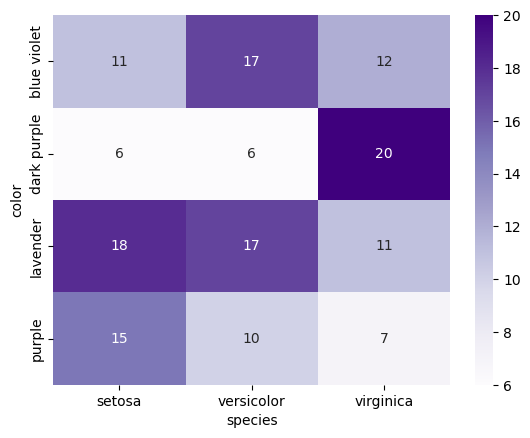

In [34]:
# Create the heatmap from the iris_ct matrix 
sns.heatmap(iris_ct, cmap = "Purples", annot = True)

# Show
plt.show()

The resulting output of the <b>heatmap</b> function displays cells with a higher count in darker shade of purple. The purple Colormap is specified by the <b>cmap</b> parameter. The <b>annot</b> parameter has been set to <span class="str">True</span> to display the count in each cell. Looking at the heatmap shows that the dark purple virginia iris occurs the most in the dataset with it being encountered 20 times. 

<h4><u>Joint Grid</u></h4>

Another option to visualize the Iris dataset with Seaborn is to use a <b>JointGrid</b>. <b>JointGrid</b> draws a bivariate plot as the focus of the Axes and univariate plots on the marigns of the Axes <a href = "https://seaborn.pydata.org/generated/seaborn.JointGrid.html">(Seaborn, 2021)</a>. Let's create a scatterplot as the joint distribution plot and histograms as the plots on the margins for the <i>petal length</i> and <i>petal width</i> attributes. 

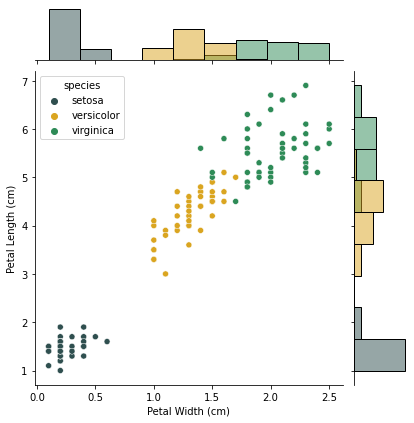

In [46]:
# Create the JointGrid object 
jg_plot = sns.JointGrid(x = iris_df["petal_w"], y = iris_df["petal_len"], data = iris_df, palette = species_palette, hue = "species")

# Create the joint plot 
jg_plot.plot_joint(sns.scatterplot)

# Create the marginal plot
jg_plot.plot_marginals(sns.histplot)

jg_plot_axs = jg_plot.fig.axes
jg_plot_axs[0].set_xlabel("Petal Width (cm)")
jg_plot_axs[0].set_ylabel("Petal Length (cm)")

# Show 
plt.show()

First a <b>JointGrid</b> object is created specifying the <i>petal length</i> as the variable on the y-axis and the <i>petal width</i> as the variable on the x-axis. The <b><i>palette and hue </i></b> are passed in the <b><i>species_palette</i></b> and <i>species</i> column name to plot each species eparately. 

The returned <b>JointGrid</b> object, <b><i>jg_plot's</i></b> <b>plot_joint</b> method is used to create a scatterplot as the joint plot. This is followed by the <b>plot_marginals</b> method to display the histograms on the marginals of the plot. The x and y-axis labels are updated and the plot is displayed. 

<h3 class="yt">Your Turn</h3>

In these <span class="yt">Your Turns</span> you'll create different visualizations for the <i>sepal length</i> and <i>sepal width</i> attributes from the <b><i>Iris dataset</i></b>. Your visualizations should follow the below guidelines. 
<ul>
    <li>If instructions specify to create a plot based on <i>species</i> use the <b>hue</b> parameter to do so.</li><br>
    <li>Choose a color palette and apply it to each plot you create. Check out <a href = "https://seaborn.pydata.org/tutorial/color_palettes.html">Choosing color palettes</a> and <a href = "https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f">Color Guide to Seaborn Palettes</a> fo ideas. </li><br>
    <li>All visualizations created should be labeled with or include: <b><i>title, x-axis label, y-axis label, and a legend if applicable</i></b>. </li>
</ul>

<h3 class="yt">Your Turn - 1</h3>

Calculate and print <b><i>descriptive statistics</i></b> for <i>sepal_len</i> and <i>sepal_w</i> for each <i>species</i>.

In [40]:
# Your Turn - 1
#Sepal Length
sepal_len_spec_stat = iris_df.groupby(["species"])["sepal_len"].describe()
print("                     ---Sepal Length Stats---")
print(sepal_len_spec_stat)
print('\n')
#Sepal Width
sepal_w_stat = iris_df.groupby(["species"])["sepal_w"].describe()
print("                     ---Sepal Width Stats---")
print(sepal_w_stat)

                     ---Sepal Length Stats---
            count   mean       std  min    25%  50%  75%  max
species                                                      
setosa       50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8
versicolor   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0
virginica    50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9


                     ---Sepal Width Stats---
            count   mean       std  min    25%  50%    75%  max
species                                                        
setosa       50.0  3.428  0.379064  2.3  3.200  3.4  3.675  4.4
versicolor   50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4
virginica    50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8


<h3 class="yt">Your Turn - 2</h3>

Define the color palette you want to use and store it as the variable <b><i>yt_palette</i></b> which stands for "Your Turn - Palette". <b><i>Hint:</i></b>Make sure to set the number of colors in the palette equal to the number of unique species in the Iris dataset</i>. Display the color palette using <b>palplot</b>. 

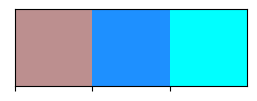

In [57]:
# Your Turn - 2
colors_used = ["rosybrown", "dodgerblue", "cyan"]
yt_palette = sns.color_palette(colors_used, 3, as_cmap = True)

# Display palette
sns.palplot(yt_palette)
plt.show()

<h3 class="yt">Your Turn - 3</h3>
Create a KDE plot displaying the <i>sepal length</i> for each species in the <b><i>Iris dataset</i></b>. 

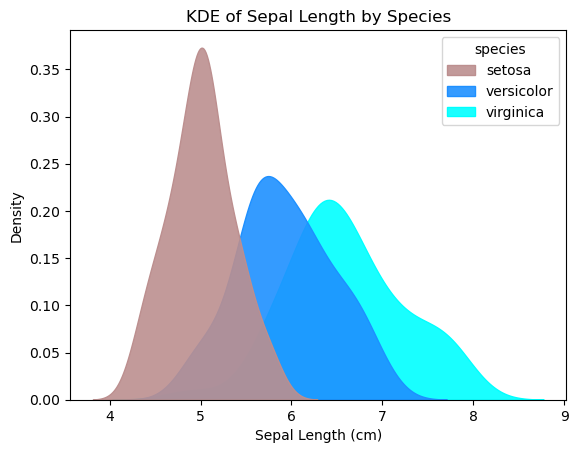

In [58]:
# Your Turn - 3
kde_plot = sns.kdeplot(x = "sepal_len", data = iris_df, palette = yt_palette, fill = True, alpha = .9, hue = "species", legend = True)
kde_plot_axs = kde_plot.axes
kde_plot_axs.set_title("KDE of Sepal Length by Species")
kde_plot_axs.set_xlabel("Sepal Length (cm)")

# Show
plt.show()

<h3 class="yt">Your Turn - 4</h3>

Create a <b><i>swarm plot</i></b> with <i>sepal_len</i> for <b><i>x</i></b> and <i>species</i> for <b><i>y</i></b>. 

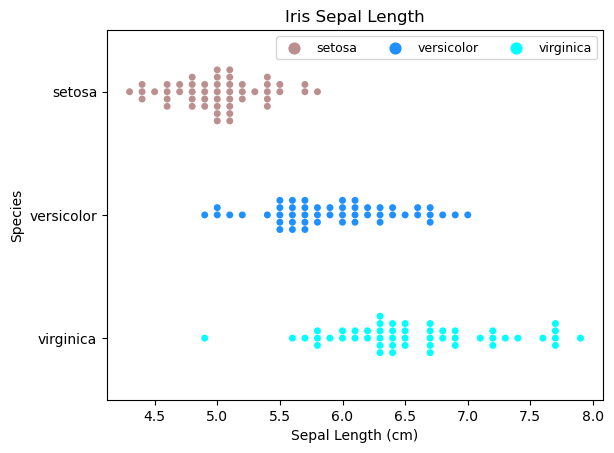

In [59]:
# Your Turn - 4
swarm = sns.swarmplot(x = "sepal_len", y = "species", data = iris_df, palette = yt_palette, size = 5, hue = "species")

# Get the Axes object. 
swarm_axs = swarm.axes
swarm_axs.set_title("Iris Sepal Length")
swarm_axs.set_xlabel("Sepal Length (cm)")
swarm_axs.set_ylabel("Species")
swarm_axs.legend(ncol = 3, loc = "upper right", fontsize = 9)

# Show 
plt.show()

<h3 class="yt">Your Turn - 5</h3>

Create a <b><i>heat map</i></b> with <i>color</i> as the row grouping and <i>species</i> as the column grouping. The heat map should have the <b><i>values</i></b> set to <i>sepal_len</i> and the <b><i>aggfunc</i></b> specified to calculate the <b><i>"mean"</i></b>. Set <b><i>annot</i></b> equal to <span class="bltn">True</span> to display the mean values as annotations to the heat map. 

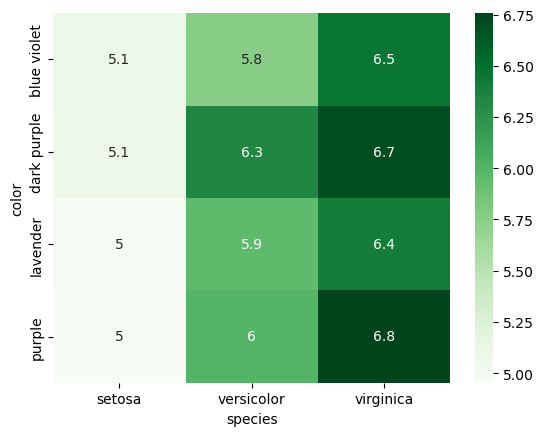

In [67]:
# Your Turn - 5
iris_mu = pd.crosstab(iris_df["color"],iris_df["species"], values=iris_df["sepal_len"],aggfunc= "mean")
sns.heatmap(iris_mu, cmap = "Greens", annot = True)
plt.show()


<h3 class="yt">Your Turn - 6</h3>

Create a <b>JointGrid</b> displaying each <i>species</i> <i>sepal_w</i> as the <b><i>x</i></b> value and <i>sepal_len</i> as the <b><i>y</i></b>. Create a <b><i>kdeplot</i></b> for the <b><i>joint plot</i></b> and a <b><i>filled kdeplot</i></b> for the <b><i>marginal plots</i></b>. 

Before beginning this <span class="yt">Your Turn</span> run the <b>move_legend</b> function. This function from <a href = "https://github.com/mwaskom/seaborn/issues/2280">mwaskom's answer to "Not clear how to reposition seaborn.histplot legend #2280"</a> simplifies the movement of the legend. You will need to adjust the position of the legend as Seaborn may generate it over the joint distribution KDE plots. 

In [68]:
# Make sure to run this Code cell before working on Your Turn - 6

# Code from https://github.com/mwaskom/seaborn/issues/2280
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

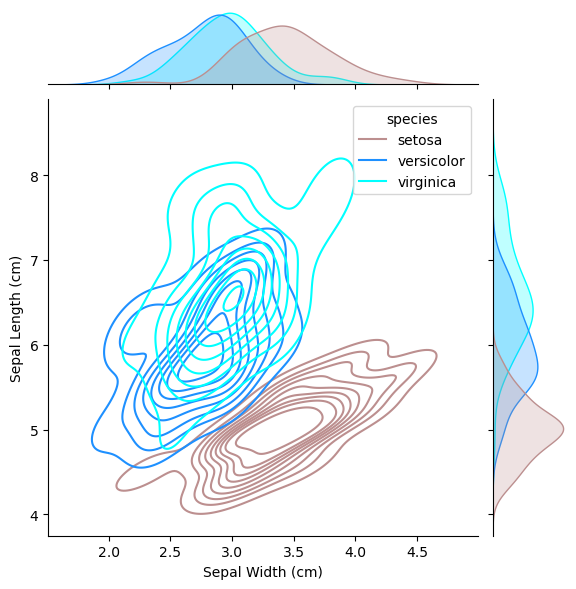

In [72]:
# Your Turn - 6
jg_plot = sns.JointGrid(x = iris_df["sepal_w"], y = iris_df["sepal_len"], data = iris_df, palette = yt_palette, hue = "species")

# Create the joint plot 
jg_plot.plot_joint(sns.kdeplot)

# Create the marginal plot
jg_plot.plot_marginals(sns.kdeplot, fill = True)

jg_plot_axs = jg_plot.fig.axes
jg_plot_axs[0].set_xlabel("Sepal Width (cm)")
jg_plot_axs[0].set_ylabel("Sepal Length (cm)")

# Show 
plt.show()